In [1]:
# Time Series Material
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# DatasetTeSelec.csv
DatasetTeSelec = pd.read_csv('datasetTeSelec.csv')
# FeaturesFirstPaper.csv
featuresFirstPaper = pd.read_csv('featuresFirstPaper.csv')
DatasetTeSelec.rename( columns={'Unnamed: 0':'idSerie'}, inplace=True )
featuresFirstPaper.head()

,id,size,entropy,trend,season,linearity,skewness,kurtosis,non_linear,hurt_long_term,chaos,white_noise,outliers,variance_sta,stacionarity
0,45,666,0.519577,0.962021,0.125502,2.966309,0.325363,-0.392092,0.219008,0.999342,-0.871990,6099.424253,0.009009,0.008779,0.098252
1,146,76,0.476825,0.922601,0.208943,-1.498773,-0.814911,0.252405,0.043169,0.994770,0.019872,262.905545,0.000000,0.091345,0.727064
2,198,486,0.386076,0.976565,0.214945,-4.032096,0.293145,-0.097634,0.499875,0.999509,0.017412,4640.556833,0.041152,0.006847,0.010000
3,205,918,0.095245,0.999648,0.191240,-7.876807,0.476262,-0.834687,0.006718,0.999954,0.003786,10511.685675,0.009804,0.000011,0.433513
4,211,475,0.278448,0.969854,0.183740,-3.353083,1.461076,4.203096,0.523010,0.999593,0.009928,4267.378516,0.077895,0.062216,0.036999


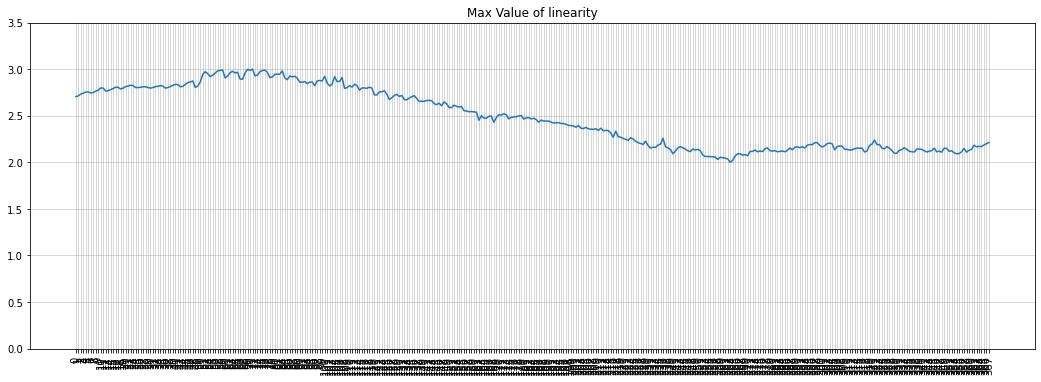

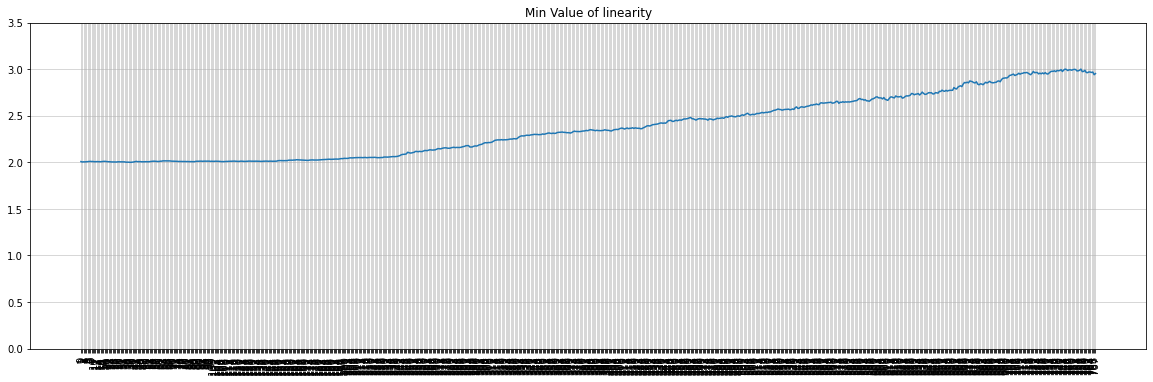

In [95]:
#Get the min and max values for each column in the dataframe
def getMaxandMin(dataset):
    maxSeries = dataset.max();
    minSeries = dataset.min();    
    return maxSeries,minSeries

def generatePlot(dataset1, dataset2, feature):
    
    # Get rows from data set with max and min values
    values = getMaxandMin(dataset1)
    minValueData = dataset1.loc[dataset1[feature] == values[1][feature]]
    maxValueData = dataset1.loc[dataset1[feature] == values[0][feature]]
    
    
    # Get time series data from second dataframe transposed
    minValueData = dataset2.loc[dataset2['idSerie'] == minValueData['id'].values[0]].reset_index(drop=True)
    maxTimeSeriesData = dataset2.loc[dataset2['idSerie'] == maxValueData['id'].values[0]].reset_index(drop=True)
    
    # Make data for plot for max value
    maxIdSerie = int(maxTimeSeriesData.iloc[0]['idSerie'])
    maxTimeSeriesData = maxTimeSeriesData.drop(['idSerie'], axis=1).squeeze().dropna()
    plt.figure(figsize=(18,6))
    plt.xticks(rotation=90)
    plt.grid(linewidth=0.5)
    plt.ylim(0, 3.5)
    plt.title("Max Value of " + feature)
    plt.plot(maxTimeSeriesData.index, maxTimeSeriesData.values)
    
    # Make data for plot for min value
    minIdSerie = int(minValueData.iloc[0]['idSerie'])
    minValueData = minValueData.drop(['idSerie'], axis=1).squeeze().dropna()
    plt.figure(figsize=(20,6))
    plt.xticks(rotation=90)
    plt.grid(linewidth=0.5)
    plt.ylim(0, 3.5)
    plt.title("Min Value of " + feature)
    plt.plot(minValueData.index, minValueData.values)
    
    return 
    

generatePlot(featuresFirstPaper,DatasetTeSelec, 'linearity')
